In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X=titanic.drop(columns=['Embarked','Cabin','PassengerId','Survived','Name','Ticket'])
Y=titanic['Survived']

In [13]:
X['Age']=X['Age'].fillna(X['Age'].mean())

In [21]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
X['Sex']=X['Sex'].astype('category').cat.codes

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int8   
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), int8(1)
memory usage: 35.8 KB


/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/launchship/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

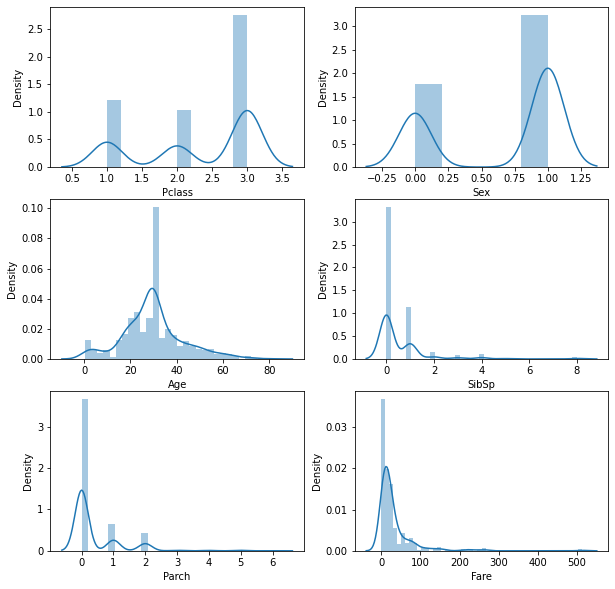

In [27]:
plt.figure(figsize=(10,10))
pltnum=1
for i in X:
    plt.subplot(3,2,pltnum)
    sns.distplot(X[i])
    pltnum+=1
    

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [34]:
Dec=DecisionTreeClassifier()

In [35]:
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
Dec.score(x_train,y_train)

0.9871589085072231

In [38]:
Dec.score(x_test,y_test)

0.8246268656716418

In [41]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [42]:
x_transform=pd.DataFrame(x_transform)
x_transform.columns=X.columns

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,Y,test_size=0.3)

In [46]:
Dec=DecisionTreeClassifier()
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
Dec.score(x_train,y_train)

0.9903691813804173

In [48]:
Dec.score(x_test,y_test)

0.753731343283582